<a href="https://colab.research.google.com/github/anko191/Python_Kaggle/blob/master/_Visualization_/Receiver_Operating_Characteristic_(ROC)_with_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ROCカーブの可視化


## CrossValidationのそれぞれのROCの図示

* https://matplotlib.org/tutorials/introductory/pyplot.html
    * matplotlib.pyplot as plt...?plt.subplot, fix, ax
    * plot()の引数

In [ ]:
print(__doc__)

Automatically created module for IPython interactive environment


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

* データをロード

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

* y == 2 のを除外する(svmはお互いの境目に線を引くので、0か1のみじゃないと駄目)
    * Iris-Setosa
    * Iris-Versicolour
    * Iris-Virginica これを除外?
* 特徴量は4つ。
    * sepal length in cm
    * sepal width in cm
    * petal length in cm
    * petal width in cm

In [ ]:
X,y = X[y != 2], y[y != 2]
X.shape, y.shape

((100, 4), (100,))

In [ ]:
n_samples, n_features = X.shape

* Add noisy features
    * 何をしているんだこいつ？？

In [ ]:
print(X[-5:])

[[5.7 3.  4.2 1.2]
 [5.7 2.9 4.2 1.3]
 [6.2 2.9 4.3 1.3]
 [5.1 2.5 3.  1.1]
 [5.7 2.8 4.1 1.3]]


In [ ]:
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [ ]:
import pandas as pd
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [54]:
import pprint
pprint.pprint(X[0][:10])

array([ 5.1       ,  3.5       ,  1.4       ,  0.2       ,  1.76405235,
        0.40015721,  0.97873798,  2.2408932 ,  1.86755799, -0.97727788])


## Cross Validation と、Classifierを選定
* SVMを使いたいので、2値

In [55]:
cv = StratifiedKFold(n_splits = 6)

In [56]:
classifier = svm.SVC(kernel = 'linear', probability = True, random_state = random_state)

In [57]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100) # 0から1の100個の配列

## matplotlibを使って図示の準備

* One-dimensional linear interpolation.

* Returns the one-dimensional piecewise linear interpolant to a function with given discrete data points (xp, fp), evaluated at x.

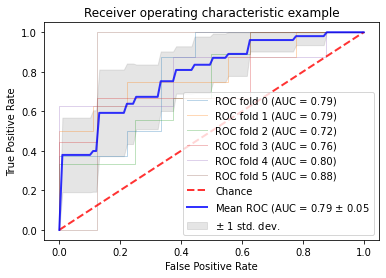

In [62]:
fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X,y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name = 'ROC fold {}'.format(i),
                         alpha = 0.3, lw = 1, ax = ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0,1], [0,1], linestyle = '--', lw = 2, color = 'r',
        label = 'Chance', alpha = 0.8)

mean_tpr = np.mean(tprs, axis = 0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(mean_fpr, mean_tpr, color = 'b',
        label = r'Mean ROC (AUC = %0.2f $\pm$ %0.2f'%(mean_auc, std_auc),
        lw = 2, alpha = 0.8)

std_tpr = np.std(tprs, axis = 0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color = 'grey', alpha = 0.2,
                label = r'$\pm$ 1 std. dev.') # ±を表示するときは $\pm$ rも必要

ax.set(xlim = [-0.05, 1.05], ylim = [-0.05, 1.05],
       title = "Receiver operating characteristic example")
ax.legend(loc = 'lower right')
plt.show()